## Step 1: Import Library

In [1]:
from presentation import *
import numpy as np

## Step 2: Parameterize Image as a Closed-Loop Function

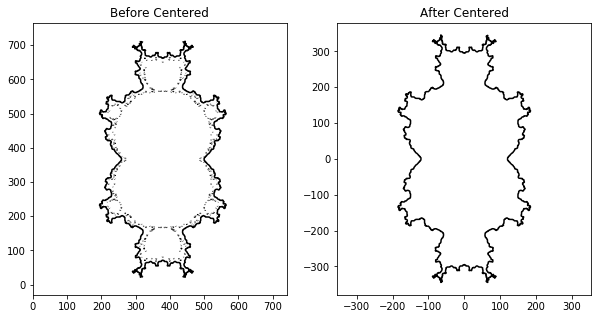

In [4]:
time_table, x_table, y_table = create_close_loop('mandel.png')

## Step 3: Calculate Discrete Fourier Transform Coefficient

In [8]:
order = 100 # We need higher order approximation to get better approximation
coef = coef_list(time_table, x_table, y_table, order)
print(coef)

[[ 1.82767910e-03  6.76191310e-03]
 [ 1.68558102e-02 -6.55581062e-02]
 [-1.79163958e-03 -1.40990247e-03]
 [-2.54687409e-02  2.68635263e-02]
 [ 2.60125258e-03 -1.50746367e-03]
 [ 1.55921555e-01 -3.47762419e-02]
 [ 8.40285872e-04  5.04912067e-04]
 [-1.30939441e-01 -3.50148043e-02]
 [-3.31464046e-03 -1.34153206e-03]
 [ 2.01001798e-01  1.74282352e-01]
 [ 1.84231935e-04 -1.74242114e-03]
 [-5.00653596e-02 -1.44359425e-01]
 [-3.72364207e-04  1.01302632e-03]
 [-4.78795039e-02  2.26287734e-01]
 [-2.83426061e-04 -2.86603755e-03]
 [-6.78137060e-02  7.44891136e-02]
 [-2.14351945e-04  8.95608345e-05]
 [ 2.89757363e-01 -1.11373200e-01]
 [-5.57396824e-03 -4.40108927e-03]
 [ 6.11132969e-02  4.29369984e-03]
 [ 1.20505033e-03 -7.66340209e-05]
 [-3.16283097e-02 -1.82193357e-02]
 [ 5.85190409e-03  3.87583920e-03]
 [-1.18290895e-01 -2.14152071e-01]
 [ 1.07412358e-03  1.49237516e-03]
 [-2.91847229e-02  3.93916699e-01]
 [-8.41395847e-04  5.39321056e-03]
 [-1.13799858e-01  1.73817217e-01]
 [-5.22394198e-03 -2

## Step 4: Evaluate Fourier Transform

In [9]:
space = np.linspace(0, tau, 300) # Did you know what tau is ? Check my previous video about it ! :D
x_DFT = [DFT(t, coef, order)[0] for t in space]
y_DFT = [DFT(t, coef, order)[1] for t in space]

## Step 5: Visualize it

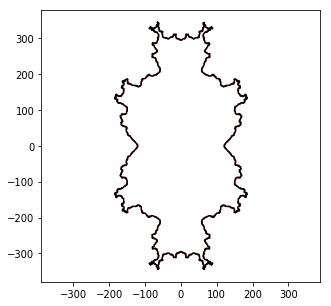

In [10]:
fig, ax = plt.subplots(figsize=(5, 5))
ax.plot(x_DFT, y_DFT, 'r--')
ax.plot(x_table, y_table, 'k-')
ax.set_aspect('equal', 'datalim')
xmin, xmax = xlim()
ymin, ymax = ylim()

## Step 6: Create Epicycle Animation

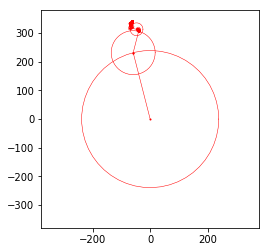

In [11]:
anim = visualize(x_DFT, y_DFT, coef, order, space, [xmin, xmax, ymin, ymax])
Writer = animation.writers['html']
writer = Writer(fps=60)
anim.save('mandelbrot.html',writer=writer, dpi=150)